<a href="https://colab.research.google.com/github/LIZZETHGOMEZ/BEDU-Santander-2021/blob/main/Sesion_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sesión 3: Visualización de datos y variables categórcas

### Gráficas de densidad
* Displot  (variedad de graficas)
* kdeplot 

In [1]:
import numpy as np
import seaborn as sns

In [2]:
# Una normcal con centro en -2 ...
normal_1 = np.random.normal(loc = -2, scale = 3, size = 10000)
normal_2 = np.random.normal(loc = 0, scale = 2, size = 10000)
normal_3 = np.random.normal(loc = 2, scale = 1, size = 10000)

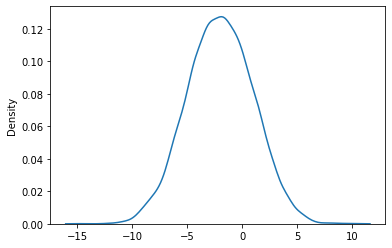

In [8]:
sns.kdeplot(normal_1);

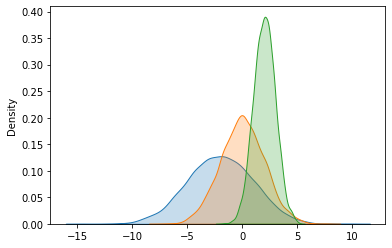

In [7]:
# Si las imprimimos a la vez, nos la pega sobre el mimo grafico
# con fill le metemos relleno
sns.kdeplot(normal_1, fill = True)
sns.kdeplot(normal_2, fill = True)
sns.kdeplot(normal_3, fill = True);

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/datasets_BEDU/Remoto athlete_olympic_events-clean.csv')
df.head()

,athlete_id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
3,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
4,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


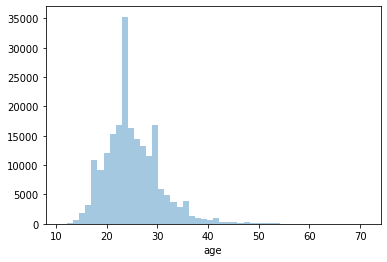

In [16]:
# Distplot o displot
# Distribución de las edades
sns.distplot(df['age'], kde = False, norm_hist = False);

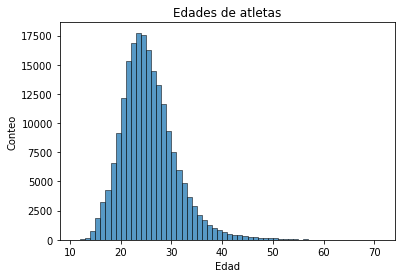

<Figure size 432x288 with 0 Axes>

In [29]:
# Histograma con displot y guardamos
ax = sns.histplot(df['age'], binwidth = 1);
ax.set(title = 'Edades de atletas', xlabel = 'Edad', ylabel = 'Conteo');
plt.show();
plt.savefig('edades.jpg');

In [32]:
# Unimos columnas que sean del mismo atleta (agrupamos)
por_atleta = df.groupby('name')[['age','height','weight', 'sex']].max()
por_atleta.head()

,age,height,weight,sex
name,,,,
Th Anh,20.0,165.0,58.0,F
Th Ngn Thng,23.0,147.0,47.0,F
Tin Tun,21.0,173.0,63.0,M
A Dijiang,24.0,180.0,80.0,M
A Lamusi,23.0,170.0,60.0,M


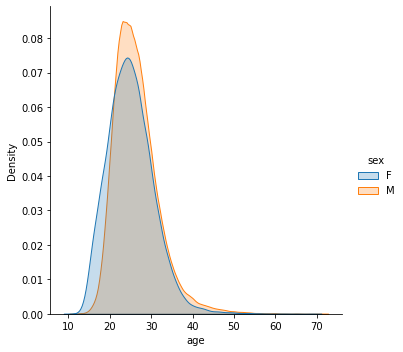

In [42]:
#Indicamos que variable queremos graficar
# con hue podemos graficar las categorías de interés
# kind indica el tipo de grafico, histograma (hist) o de densidad(kde)
# common_norm = false calcula la densidad por variable, o sea independiente, por default es True, pues las suma
sns.displot(por_atleta, x = 'age', hue = 'sex', kind = 'kde', common_norm = False, fill = True);

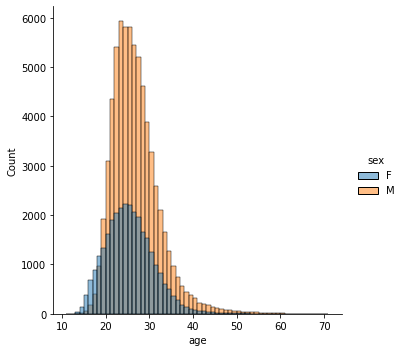

In [45]:
sns.displot(por_atleta, x = 'age', hue = 'sex', binwidth = 1);

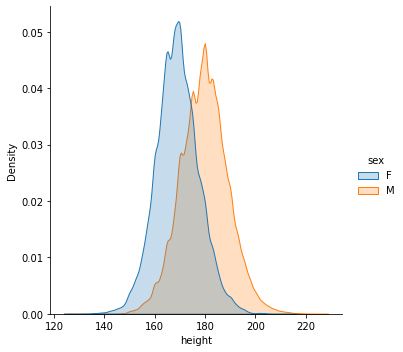

In [50]:
# Garfiquemos la altura
sns.displot(por_atleta, x = 'height', hue = 'sex', kind = 'kde', fill = True, common_norm = False);

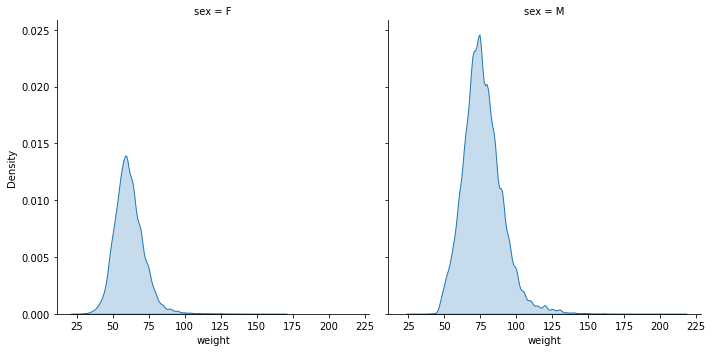

In [53]:
# Graficando las categorias por grafica
# col nos permite hacer graficas por categoria sustituye a hue
sns.displot(por_atleta, x = 'weight', col = 'sex', kind = 'kde', fill = True);

### Gráficos de barras

In [54]:
df = pd.read_json('/content/drive/MyDrive/datasets_BEDU/Remoto zomato_reviews-clean.json')
df.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


In [55]:
df['user_rating'].unique()

array(['Very Good', 'Excellent', 'Poor', 'Good', 'Average', 'Not rated'],
      dtype=object)

In [56]:
#Transformamos a categoria (que ahorra memoria y tiempo de ejecución)
df['user_rating'].astype('category')

0       Very Good
1       Excellent
2       Very Good
3       Very Good
4       Very Good
          ...    
1175    Very Good
1176    Excellent
1177    Excellent
1178         Good
1179         Good
Name: user_rating, Length: 1180, dtype: category
Categories (6, object): ['Average', 'Excellent', 'Good', 'Not rated', 'Poor', 'Very Good']

In [57]:
#Observemos el numero de restaurantes por cada categoria
df['user_rating'].value_counts()

Very Good    490
Good         346
Excellent    194
Average      119
Not rated     26
Poor           5
Name: user_rating, dtype: int64

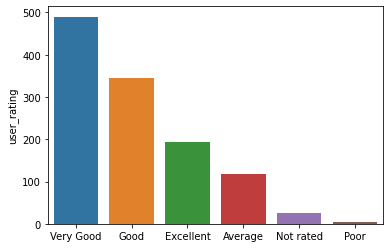

In [74]:
#Graficamos
counts = df['user_rating'].value_counts()
sns.barplot(x = counts.index, y = counts);

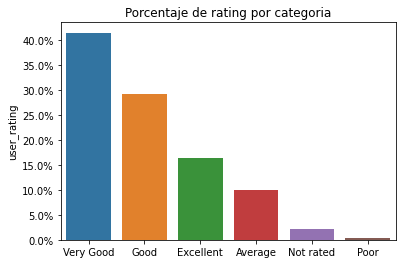

In [72]:
# En porcentajes
import matplotlib.ticker

porcentaje = round(counts*100/counts.sum(),2)
ax = sns.barplot( x = porcentaje.index, y = porcentaje);
ax.set(title = 'Porcentaje de rating por categoria');
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())

In [73]:
# Categoria con mayor ocurrencia
df['user_rating'].mode()

0    Very Good
dtype: object

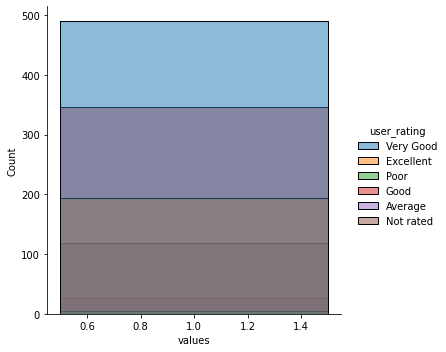

In [79]:
#Sumamos las categorias agregand un valor de 1
df['values'] = 1
sns.displot(data = df, x = 'values',  hue = 'user_rating')

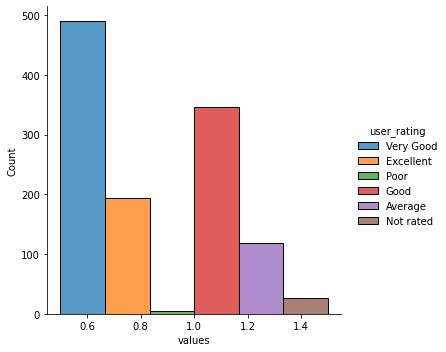

In [80]:
# Dividiendo la grafica anterior con el parametro multiple
sns.displot(data = df, x = 'values',  hue = 'user_rating', multiple = 'dodge')